# Week 8 Assignment
Student: Tim Lynch
Professor: Charles Pak

1. Load the auto-mpg.data into pandas
2. Review the data and the provided data set description
3. Rename the columns based off of auto-mpg.names
4. Replace ? in horsepower column
5. Convert, 1,2,3 to USA,ASIA or EUROPE
6. Create a bar chart that shows the distribution for cylinders
7. Create a scatterplot that shows the relationship between horsepower and weight.
8. Ask, then answer an interesting question about the distribution of one of the variables (using seaborn/matplotlib)

<h1><center> Load the auto-mpg.data into pandas, review the data, and provide names to the dataframe columns </center></h1>

This was actually one of the hardest assingments to complete. The data itself was not clean and required a lot of experimenting. I have left the code I tried commented out below. 


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

%matplotlib inline

data_columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',names = data_columns)

#Ultimate Failure Data - So much time spent on trying to get the data to read correct

#data.iloc[0].str.contains('', regex = True )
#data['car name'] = data['mpg'].str.extract('(\d)', expand=True)
#data['cylinders'] = data['mpg'].str.extract('([8,6])',expand=True)
#data['displacement'] = data['mpg'].str.extract('(\d\d\d.\d)',expand=True)
#data['horsepower'] = data['mpg'].str.extract(' (\d\d\d.\d)',expand = True)
#data[['x','y','z','1','20','30','a','b','c']] = data['mpg'].str.extractall('[(\d\d+),(\d\d\d+)]').unstack().loc[:,0]
#df = data.to_csv(r'/Users/urban/Desktop/IS362Mac/Week 8 Assignment/export_data.csv', index = None, header = True)
#print(df)


#Actual working data
data2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',sep = '\s+',names= data_columns)
data2.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

<h1><center>Replace in the horsepower column ? with an appropriate value and then convert the column to numeric </center></h1>

The first thing I did was check the types of the columns. Once that is done, I replaced the '?' with '0'. Then I converted the type of __horsepower__ to a float

In [18]:
data2.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [19]:

data2['horsepower']= data2['horsepower'].replace('?','0')

data2['horsepower']= data2['horsepower'].astype(float)
data2

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
5    15.0          8         429.0       198.0  4341.0          10.0   
6    14.0          8         454.0       220.0  4354.0           9.0   
7    14.0          8         440.0       215.0  4312.0           8.5   
8    14.0          8         455.0       225.0  4425.0          10.0   
9    15.0          8         390.0       190.0  3850.0           8.5   
10   15.0          8         383.0       170.0  3563.0          10.0   
11   14.0          8         340.0       160.0  3609.0           8.0   
12   15.0          8         400.0       150.0  3761.0           9.5   
13   14.0          8         455.0       225.0  3086.0          10.0   
14   24.0          4         113.0        95.0  2372.0          15.0   
15   22.0          6         198.0        95.0  2833.0          15.5   
16   18.0          6         199.0        97.0  2774.0          15.5   
17   21.0          6         200.0        85.0  2587.0          16.0   
18   27.0          4          97.0        88.0  2130.0          14.5   
19   26.0          4          97.0        46.0  1835.0          20.5   
20   25.0          4         110.0        87.0  2672.0          17.5   
21   24.0          4         107.0        90.0  2430.0          14.5   
22   25.0          4         104.0        95.0  2375.0          17.5   
23   26.0          4         121.0       113.0  2234.0          12.5   
24   21.0          6         199.0        90.0  2648.0          15.0   
25   10.0          8         360.0       215.0  4615.0          14.0   
26   10.0          8         307.0       200.0  4376.0          15.0   
27   11.0          8         318.0       210.0  4382.0          13.5   
28    9.0          8         304.0       193.0  4732.0          18.5   
29   27.0          4          97.0        88.0  2130.0          14.5   
..    ...        ...           ...         ...     ...           ...   
368  27.0          4         112.0        88.0  2640.0          18.6   
369  34.0          4         112.0        88.0  2395.0          18.0   
370  31.0          4         112.0        85.0  2575.0          16.2   
371  29.0          4         135.0        84.0  2525.0          16.0   
372  27.0          4         151.0        90.0  2735.0          18.0   
373  24.0          4         140.0        92.0  2865.0          16.4   
374  23.0          4         151.0         0.0  3035.0          20.5   
375  36.0          4         105.0        74.0  1980.0          15.3   
376  37.0          4          91.0        68.0  2025.0          18.2   
377  31.0          4          91.0        68.0  1970.0          17.6   
378  38.0          4         105.0        63.0  2125.0          14.7   
379  36.0          4          98.0        70.0  2125.0          17.3   
380  36.0          4         120.0        88.0  2160.0          14.5   
381  36.0          4         107.0        75.0  2205.0          14.5   
382  34.0          4         108.0        70.0  2245.0          16.9   
383  38.0          4          91.0        67.0  1965.0          15.0   
384  32.0          4          91.0        67.0  1965.0          15.7   
385  38.0          4          91.0        67.0  1995.0          16.2   
386  25.0          6         181.0       110.0  2945.0          16.4   
387  38.0          6         262.0        85.0  3015.0          17.0   
388  26.0          4         156.0        92.0  2585.0          14.5   
389  22.0          6         232.0       112.0  2835.0          14.7   
390  32.0          4         144.0        96.0  2665.0          13.9   
391  36.0          4         135.0        84.0

In [20]:
data2.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

<h1><center> Convert the origin values from 1,2,3 to 'USA', 'Asia', and 'Europe'</center> </h1>

In [21]:
data2['origin']= data2['origin'].astype(str)
data2['origin']= data2['origin'].replace(to_replace={'1':'USA','2': "ASIA",'3':'EUROPE'})
data2.head(10)

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   
5  15.0          8         429.0       198.0  4341.0          10.0   
6  14.0          8         454.0       220.0  4354.0           9.0   
7  14.0          8         440.0       215.0  4312.0           8.5   
8  14.0          8         455.0       225.0  4425.0          10.0   
9  15.0          8         390.0       190.0  3850.0           8.5   

   model year origin                   car name  
0          70    USA  chevrolet chevelle malibu  
1          70    USA          buick skylark 320  
2          70    USA         plymouth satellite  
3          70    USA              amc rebel sst  
4          70    USA                ford torino  
5          70    USA           ford galaxie 500  
6          70    USA           chevrolet impala  
7          70    USA          plymouth fury iii  
8          70    USA           pontiac catalina  
9          70    USA         amc ambassador dpl

<h1><center>Create a bar chart that shows the distribution for cylinders </center><h1>

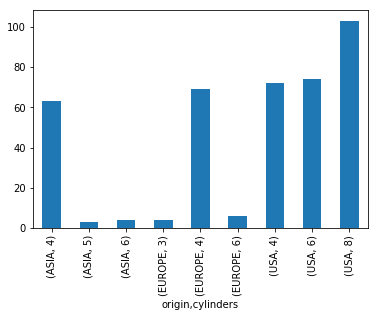

In [22]:
#6. Create a bar chart that shows the distribution for cylinders

grouped_data= data2.groupby(['origin','cylinders']).size().plot(kind='bar')

<h1><center> Create a scatterplot that shows the relationship between horsepower and weight </center></h1>

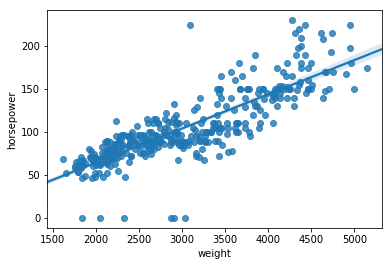

In [23]:
# Create a scatterplot
sns.regplot(x="weight", y="horsepower", data=data2);

<h1><center> For my own question I wanted to know what the average weight was for cars in each country </center></h1>

In [24]:
# Restarting over with some of the data

data3 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',sep = '\s+',names= data_columns)

data3['origin']= data3['origin'].astype(str)
data3['origin']= data3['origin'].replace(to_replace={'1':'USA','2': "ASIA",'3':'EUROPE'})

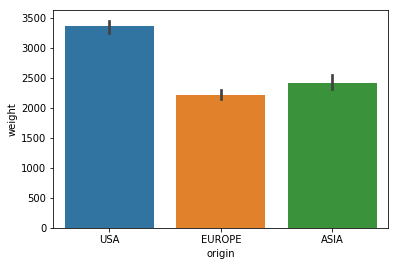

In [25]:
#Average weight per origin
sns.barplot(x = data3.origin, y = data3.weight)